# <font color='blue'> Masters Project Title: </font>

### <font color='blue'> Predicting Customer Lifetime Value In Retail/Banking Based On Customer Behaviour Analysis</font >
_Lucky Mishra (July 2021) Cohort 8_

<font color='blue'> This notebook aims at analyzing the content of an E-commerce database that lists purchases made by $\sim$4000 customers over a period of one year (from 2010/12/01 to 2011/12/09). Based on this analysis, I develop a model that allows to anticipate the purchases that will be made by a new customer, during the following year and this, from its first purchase. <br> </font>



### As part of: Masters in Data Science Dissertation

### Research Questions:
#### `Q1:` *Will it be useful to segment customers by their behavioural pattern?* 
#### `Q2:` *How RFM can be used to derive CLV for new customers?* 
#### `Q3:` *Will predicting customer lifetime monetary value be more beneficial compare to predicting their segments?* 
#### `Q4:` *Which Interpretable methods can be used to explain clustering and regression-based models?*
#### `Q5:` *Are model agnostic methods result trustworthy?* 



##### Dataset downloaded from: https://archive.ics.uci.edu/ml/datasets/Online+Retail+II

#### This file contains following sectios of the overall solution:

#### <font color='blue'>*Section 1:Clustering customers* </font>
   - 1.1 Manuall RFM analysis
   - 1.2 Auto RFM analysis
   - 1.3 Finallising RFM approach
       

#### <font color='blue'>*Section 2:Clustering Method selection* </font>
   - 2.1 Perform K- Means 
   - 2.2 Perform DBSCAN 
   - 2.3 Perform Gaussian mixture models (GMM) 
   - 2.4 Select best method  


#### <font color='blue'>*Section 3:Conclusion*</font>

In [1]:
%matplotlib inline
from __future__ import division
from chart_studio import plotly as py 
from crm_rfm_modeling import rfm
from crm_rfm_modeling.rfm import RFM
from datetime import datetime, timedelta,date
from datetime import datetime,timedelta
from IPython.display import display
from IPython.display import display, HTML
from lifetimes.plotting import *
from lifetimes.utils import *
from math import isnan
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import uniform
from pathlib import Path
from plotly.offline import init_notebook_mode,iplot
from random import sample
from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from sklearn import neighbors, linear_model, svm, tree, ensemble
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import datetime as dt
import datetime, nltk, warnings
import itertools
import matplotlib
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_profiling as pp
import plotly.graph_objects as go
import plotly.graph_objs as go
import plotly.offline as pyoff
import seaborn as sns
import xgboost as xgb
from xgboost import XGBClassifier,XGBRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostRegressor
from sklearn import neighbors, linear_model, svm, tree, ensemble
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from catboost import CatBoostClassifier
from catboost import CatBoostClassifier
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer
import lime
import lime.lime_tabular
from plotnine import ggplot,  geom_line,geom_point, aes, stat_smooth, facet_wrap,scale_x_date,theme,element_text
import plotnine as p9
from plotnine.data import mtcars
from sklearn.model_selection import KFold, cross_val_score, train_test_split
init_notebook_mode(connected=True)
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline
pd. set_option('display.max_columns', None) # or 1000.
pd. set_option('display.max_rows', None) # or 1000.
pd. set_option('display.max_colwidth', -1) # or 199.
warnings.filterwarnings("ignore")

import warnings
warnings.filterwarnings("ignore")

#### <font color='blue'>Get the clean data with cancelled transactions and outliers </font>

In [2]:
df_year_2009_2011_clean =pd.read_excel(open('df_year_2009_2011_clean_with_C.xlsx', 'rb'))

In [3]:
df_year_2009_2011_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625508 entries, 0 to 625507
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Invoice           625508 non-null  object        
 1   StockCode         625508 non-null  object        
 2   Description       625508 non-null  object        
 3   Quantity          625508 non-null  int64         
 4   InvoiceDate       625508 non-null  datetime64[ns]
 5   Price             625508 non-null  float64       
 6   Customer ID       625508 non-null  int64         
 7   Country           625508 non-null  object        
 8   Revenue           625508 non-null  float64       
 9   Month             625508 non-null  int64         
 10  Time              625508 non-null  object        
 11  Year              625508 non-null  int64         
 12  Day               625508 non-null  int64         
 13  Quarter           625508 non-null  int64         
 14  Week

In [4]:
df_year_2009_2011_clean.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Month,Time,Year,Day,Quarter,Week_Day,BillingMonthYear
0,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:44:59.999999,1.25,13085,United Kingdom,30.00,12,07:45:00,2009,1,4,Tuesday,200912
1,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:44:59.999999,1.25,13085,United Kingdom,30.00,12,07:45:00,2009,1,4,Tuesday,200912
2,489435,22350,CAT BOWL,12,2009-12-01 07:46:00.000000,2.55,13085,United Kingdom,30.60,12,07:46:00,2009,1,4,Tuesday,200912
3,489435,22353,LUNCHBOX WITH CUTLERY FAIRY CAKES,12,2009-12-01 07:46:00.000000,2.55,13085,United Kingdom,30.60,12,07:46:00,2009,1,4,Tuesday,200912
4,489436,21754,HOME BUILDING BLOCK WORD,3,2009-12-01 09:06:00.000001,5.95,13078,United Kingdom,17.85,12,09:06:00,2009,1,4,Tuesday,200912


In [5]:
df_year_2009_2011_clean[df_year_2009_2011_clean['Quantity']<0].count()

Invoice             10457
StockCode           10457
Description         10457
Quantity            10457
InvoiceDate         10457
Price               10457
Customer ID         10457
Country             10457
Revenue             10457
Month               10457
Time                10457
Year                10457
Day                 10457
Quarter             10457
Week_Day            10457
BillingMonthYear    10457
dtype: int64

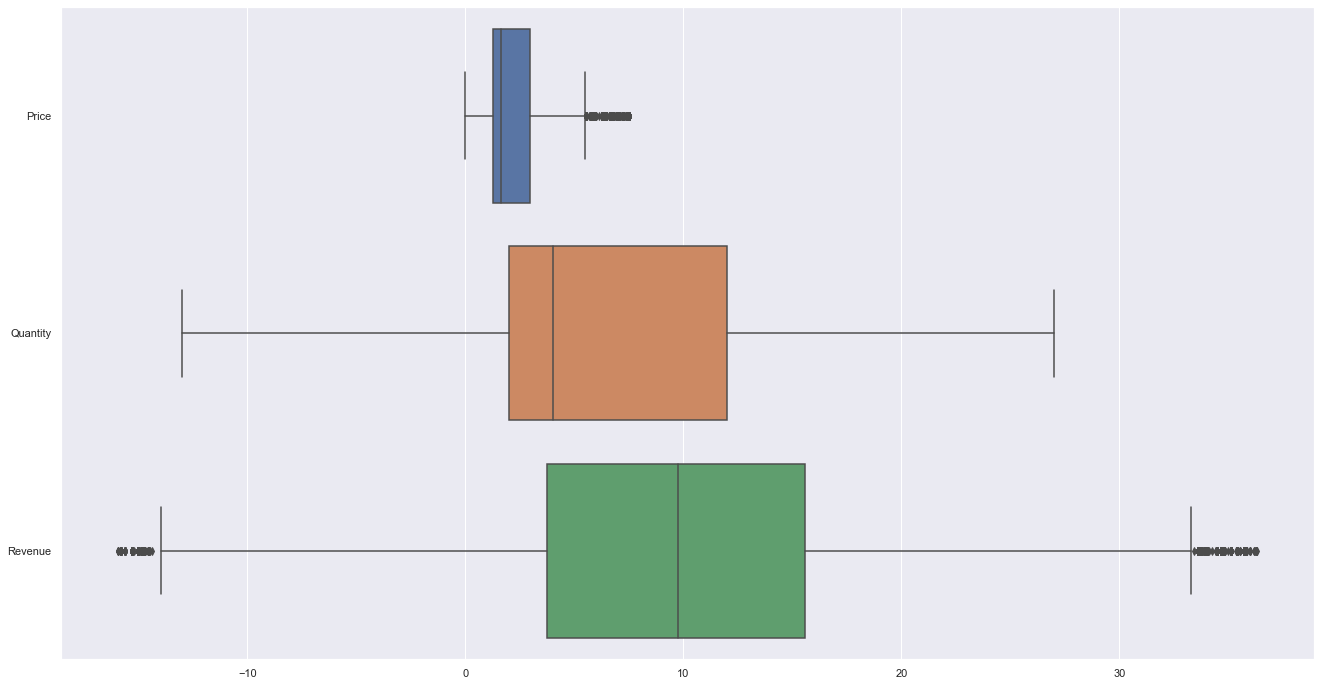

In [6]:
# Plotting BoxPlots for the Bill Amount
sns.set(rc={'figure.figsize':(20,12)})
sns.boxplot(data=df_year_2009_2011_clean[['Price','Quantity','Revenue']], orient="h")
plt.show()

In [7]:
print("PRICE")
print("{:.2f} % of the U.K transactions made were less than £8.".format(df_year_2009_2011_clean[df_year_2009_2011_clean['Price']<=10].shape[0]/df_year_2009_2011_clean['Price'].shape[0]*100))
print("{:.2f} % of the U.K transactions made were negative.".format(df_year_2009_2011_clean[df_year_2009_2011_clean['Price']<0].shape[0]/df_year_2009_2011_clean['Price'].shape[0]*100))

print("QUANTITY")
print("{:.2f} % of the transactions made with less than 25quantity .".format(df_year_2009_2011_clean[df_year_2009_2011_clean['Quantity']<=25].shape[0]/df_year_2009_2011_clean['Price'].shape[0]*100))
print("{:.2f} % of the transactions made were wtih negative quantity.".format(df_year_2009_2011_clean[df_year_2009_2011_clean['Quantity']<0].shape[0]/df_year_2009_2011_clean['Price'].shape[0]*100))


PRICE
100.00 % of the U.K transactions made were less than £8.
0.00 % of the U.K transactions made were negative.
QUANTITY
99.99 % of the transactions made with less than 25quantity .
1.67 % of the transactions made were wtih negative quantity.


<font color='blue'>The Quantity is skewed due to negative quantities</font>

In [8]:
df_year_2009_2011_clean.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Month,Time,Year,Day,Quarter,Week_Day,BillingMonthYear
0,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:44:59.999999,1.25,13085,United Kingdom,30.00,12,07:45:00,2009,1,4,Tuesday,200912
1,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:44:59.999999,1.25,13085,United Kingdom,30.00,12,07:45:00,2009,1,4,Tuesday,200912
2,489435,22350,CAT BOWL,12,2009-12-01 07:46:00.000000,2.55,13085,United Kingdom,30.60,12,07:46:00,2009,1,4,Tuesday,200912
3,489435,22353,LUNCHBOX WITH CUTLERY FAIRY CAKES,12,2009-12-01 07:46:00.000000,2.55,13085,United Kingdom,30.60,12,07:46:00,2009,1,4,Tuesday,200912
4,489436,21754,HOME BUILDING BLOCK WORD,3,2009-12-01 09:06:00.000001,5.95,13078,United Kingdom,17.85,12,09:06:00,2009,1,4,Tuesday,200912


### <font color='blue'> Customer Segmentation using RFM </font>

Customers who use the online platform have different requirements and they have their different profile. The firm should adapt to the actions accordingly.

Depending on the goals, one can segment the data in a variety of ways. If the retention rate required improvement then the customer segmentation should be according to their likelihood of churning and take appropriate actions. 

RFM is a common and acceptable method to prepare data for clustering
RFM stands for Recency - Frequency - Monetary Value. 

- Recency - How recent the customer did the transaction. The less the better.
- Frequency - How many times the customer did the transaction. the more the better.
- Monetary- The price paid by the customer in each transaction or the revenue generated for the customer. The more the better.

- As the methodology, we need to calculate Recency, Frequency and Monetary Value (we will call it Revenue from now on) and apply unsupervised machine learning to identify different groups (clusters) of customers. This will give us to segments according to CLV

Two different RFM approaches are taken here
- Manual RFM 
- RFM using lifetimes

The output from both the methods then will be passed to the three clustering algorithms (K-Means, DBSCAN,GMM) to find out which method performed better.


 

#### Country column is not required as it is UK

In [9]:
df_year_2009_2011_clean.groupby('Country')['Customer ID'].count()

Country
EIRE              11123 
France            10648 
Germany           13287 
Netherlands       1639  
United Kingdom    588811
Name: Customer ID, dtype: int64

In [10]:
df_year_2009_2011_clean=df_year_2009_2011_clean[['Customer ID','Invoice','StockCode','Description','Quantity','InvoiceDate','Price','Revenue','Country']]
 

In [11]:
df_year_2009_2011_clean.head(3)

,Customer ID,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Revenue,Country
0,13085,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:44:59.999999,1.25,30.0,United Kingdom
1,13085,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:44:59.999999,1.25,30.0,United Kingdom
2,13085,489435,22350,CAT BOWL,12,2009-12-01 07:46:00.000000,2.55,30.6,United Kingdom


In [12]:
df_rfm=df_year_2009_2011_clean.copy()
df_rfm['InvoiceDate'] = pd.to_datetime(df_rfm['InvoiceDate'], format='%d%b%Y:%H:%M:%S.%f')

In [13]:
df_rfm.head(3)
 

,Customer ID,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Revenue,Country
0,13085,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:44:59.999999,1.25,30.0,United Kingdom
1,13085,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:44:59.999999,1.25,30.0,United Kingdom
2,13085,489435,22350,CAT BOWL,12,2009-12-01 07:46:00.000000,2.55,30.6,United Kingdom


In [14]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625508 entries, 0 to 625507
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Customer ID  625508 non-null  int64         
 1   Invoice      625508 non-null  object        
 2   StockCode    625508 non-null  object        
 3   Description  625508 non-null  object        
 4   Quantity     625508 non-null  int64         
 5   InvoiceDate  625508 non-null  datetime64[ns]
 6   Price        625508 non-null  float64       
 7   Revenue      625508 non-null  float64       
 8   Country      625508 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 43.0+ MB


#### <font color='blue'> Calculate the R,F,M manually first </font>

In [15]:
def RFM_Features(df, customerID, invoiceDate, transID, sales):
    ''' Create the Recency, Frequency, and Monetary features from the data '''
    # Final date in the data + 1 to create latest date
    latest_date = df[invoiceDate].max() + timedelta(1)
    
    # RFM feature creation
    RFMScores = df.groupby(customerID).agg({invoiceDate: lambda x: (latest_date - x.max()).days, 
                                          transID: lambda x: len(x), sales: lambda x: sum(x)})
    
    # Converting invoiceDate to int since this contains number of days
    RFMScores[invoiceDate] = RFMScores[invoiceDate].astype(int)
    
    # Renaming column names to Recency, Frequency and Monetary
    RFMScores.rename(columns={invoiceDate: 'Recency', transID: 'Frequency', sales: 'Monetary'}, inplace=True)
    
    return RFMScores.reset_index()

In [16]:
RFM = RFM_Features(df=df_rfm, customerID= "Customer ID", invoiceDate = "InvoiceDate", transID= "Invoice", sales="Revenue")
RFM.head()

,Customer ID,Recency,Frequency,Monetary
0,12346,431,37,311.37
1,12413,67,31,545.20
2,12426,195,73,1086.86
3,12427,22,23,375.01
4,12437,2,438,7397.13


#### <font color='blue'> Calculate the R,F,M using lifetimes </font>

In [17]:
import lifetimes

# set the last transaction date as the end point for this historical dataset
current_date = df_rfm['InvoiceDate'].max()

# calculate the required customer metrics
RFM_LT = (
  lifetimes.utils.summary_data_from_transaction_data(
    df_rfm,
    customer_id_col='Customer ID',
    datetime_col='InvoiceDate',
    observation_period_end = current_date, 
    freq='D'
    )
  ).reset_index() #.reset_index(drop=True)
 
# display first few rows
RFM_LT.head() 

,Customer ID,frequency,recency,T
0,12346,8.0,294.0,725.0
1,12413,2.0,271.0,337.0
2,12426,2.0,468.0,662.0
3,12427,3.0,350.0,371.0
4,12437,36.0,736.0,737.0


In [18]:
#RFM_LT=RFM_LT.rename({'frequency':'Frequency','recency':'Recency','T':'Monetary'})
RFM_LT.rename(columns={'frequency': 'Frequency', 'recency': 'Recency', 'T': 'Monetary'}, inplace=True)

In [19]:
RFM[['Frequency','Recency','Monetary']].describe()

,Frequency,Recency,Monetary
count,5363.000000,5363.000000,5363.000000
mean,116.633974,200.552676,1229.580466
std,304.539863,209.627974,2945.102149
min,1.000000,1.000000,-273.470000
25%,17.000000,25.000000,203.020000
50%,45.000000,94.000000,508.570000
75%,119.000000,380.000000,1291.360000
max,11754.000000,739.000000,137650.360000


In [20]:
RFM_LT[['Frequency','Recency','Monetary']].describe()

,Frequency,Recency,Monetary
count,5363.000000,5363.000000,5363.000000
mean,4.997390,274.870222,474.968488
std,10.265153,258.688317,224.121369
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,313.000000
50%,2.000000,224.000000,532.000000
75%,6.000000,513.000000,669.000000
max,265.000000,738.000000,738.000000


In [21]:
RFM.count()

Customer ID    5363
Recency        5363
Frequency      5363
Monetary       5363
dtype: int64

In [22]:
RFM_LT.count()

Customer ID    5363
Frequency      5363
Recency        5363
Monetary       5363
dtype: int64

#### <font color='red'>It's clear that the liftime RFM method has done some normalisation on the data and removed the negative values and outliers automatically without loosing the number of rows </font>

#### <font color='blue'> Otliers view of manualy calculated RFM </font>

Text(0.5, 1.0, '(RFM) Recency')

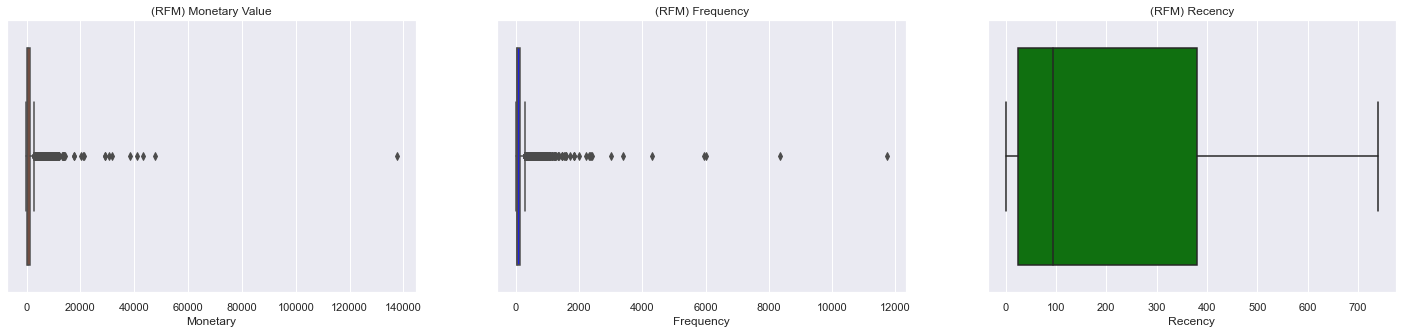

In [23]:
plt.figure(figsize=(30,5))
plt.subplot(141)
sns.boxplot(RFM.Monetary , color = "orangered" )#  , showfliers = False)
plt.title("(RFM) Monetary Value")
plt.subplot(142)
sns.boxplot(RFM["Frequency"]  ,color = "blue" )#  , showfliers = False)
plt.title("(RFM) Frequency") 
plt.subplot(143)
sns.boxplot(RFM["Recency"] ,color = "green" )#  , showfliers = False)
plt.title("(RFM) Recency") 

#### <font color='blue'> RFM calculated using lifetimes </font>

Text(0.5, 1.0, '(RFM) Recency')

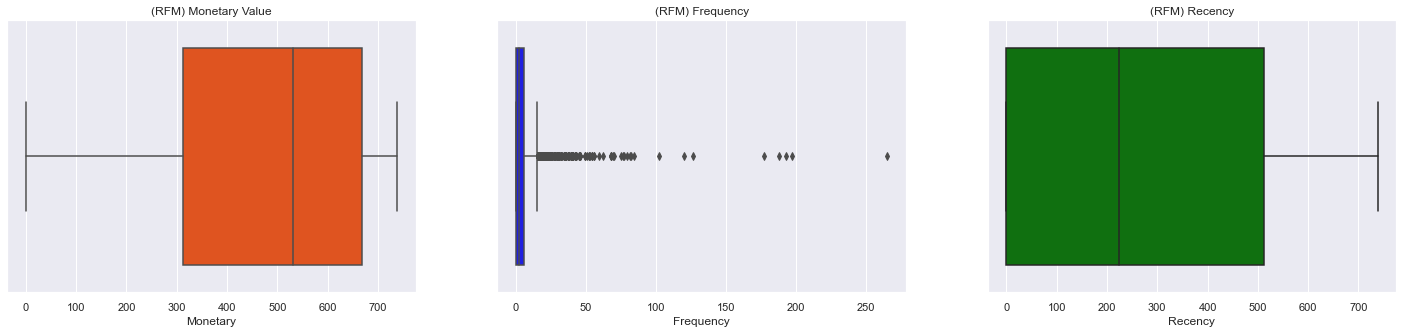

In [24]:
plt.figure(figsize=(30,5))
plt.subplot(141)
sns.boxplot(RFM_LT.Monetary , color = "orangered" )#  , showfliers = False)
plt.title("(RFM) Monetary Value")
plt.subplot(142)
sns.boxplot(RFM_LT["Frequency"]  ,color = "blue" )#  , showfliers = False)
plt.title("(RFM) Frequency") 
plt.subplot(143)
sns.boxplot(RFM_LT["Recency"] ,color = "green" )#  , showfliers = False)
plt.title("(RFM) Recency") 

#### <font color='blue'>Distribution plot of manually calculated RFM </font>

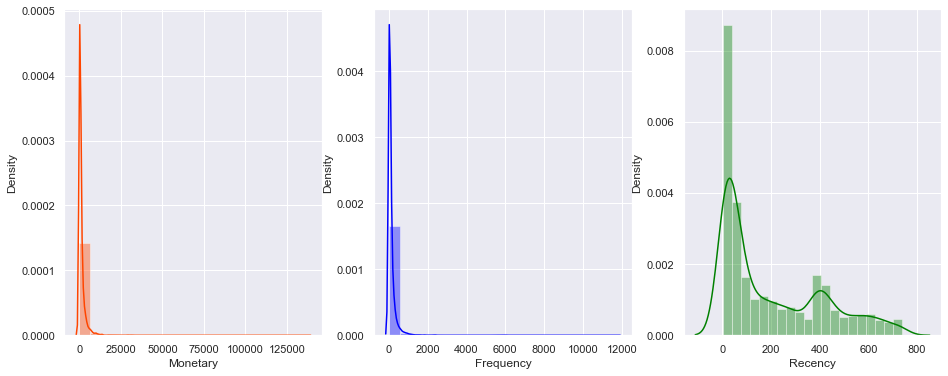

In [25]:
# Distributions of Recency, Frequency, and Monetary features
# Here we will filter out the extreme values in the Frequency and Monetary columns to avoid the skewness the distribution
fig, ax = plt.subplots(1,3, figsize=(14,6))
sns.distplot(RFM['Monetary'], bins=20, ax=ax[0], color = "orangered" )
sns.distplot(RFM['Frequency'], bins=20, ax=ax[1],color = "blue")
sns.distplot(RFM.Recency, bins=20, ax=ax[2],color = "green")
plt.show()

#### <font color='blue'>Distribution plot of liftime generated RFM </font>

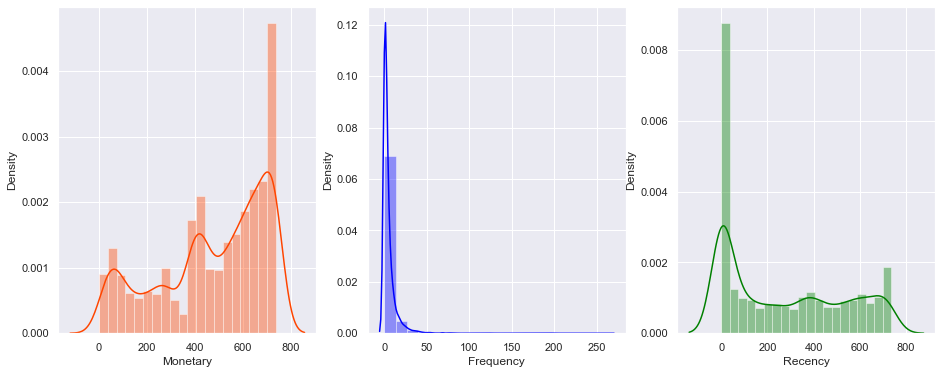

In [26]:
# Distributions of Recency, Frequency, and Monetary features
# Here we will filter out the extreme values in the Frequency and Monetary columns to avoid the skewness the distribution
fig, ax = plt.subplots(1,3, figsize=(14,6))
sns.distplot(RFM_LT['Monetary'], bins=20, ax=ax[0], color = "orangered" )
sns.distplot(RFM_LT['Frequency'], bins=20, ax=ax[1],color = "blue")
sns.distplot(RFM_LT.Recency, bins=20, ax=ax[2],color = "green")
plt.show()

### <font color='blue'>Performing clustering algorithms on each method one by one</font>

### <font color='blue'>1 - Using manually calculated RFM</font>

In [27]:
#Common methods Taken from sklearn help website 
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18,15)

from sklearn import mixture

color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold','darkorange'])


def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

  #  plt.xlim(-9., 5.)
  #  plt.ylim(-3., 6.)
    plt.xticks(())
    plt.yticks(())
    plt.figtext(.5,.8,title,fontsize=15,ha='center')
   # plt.title(title)

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

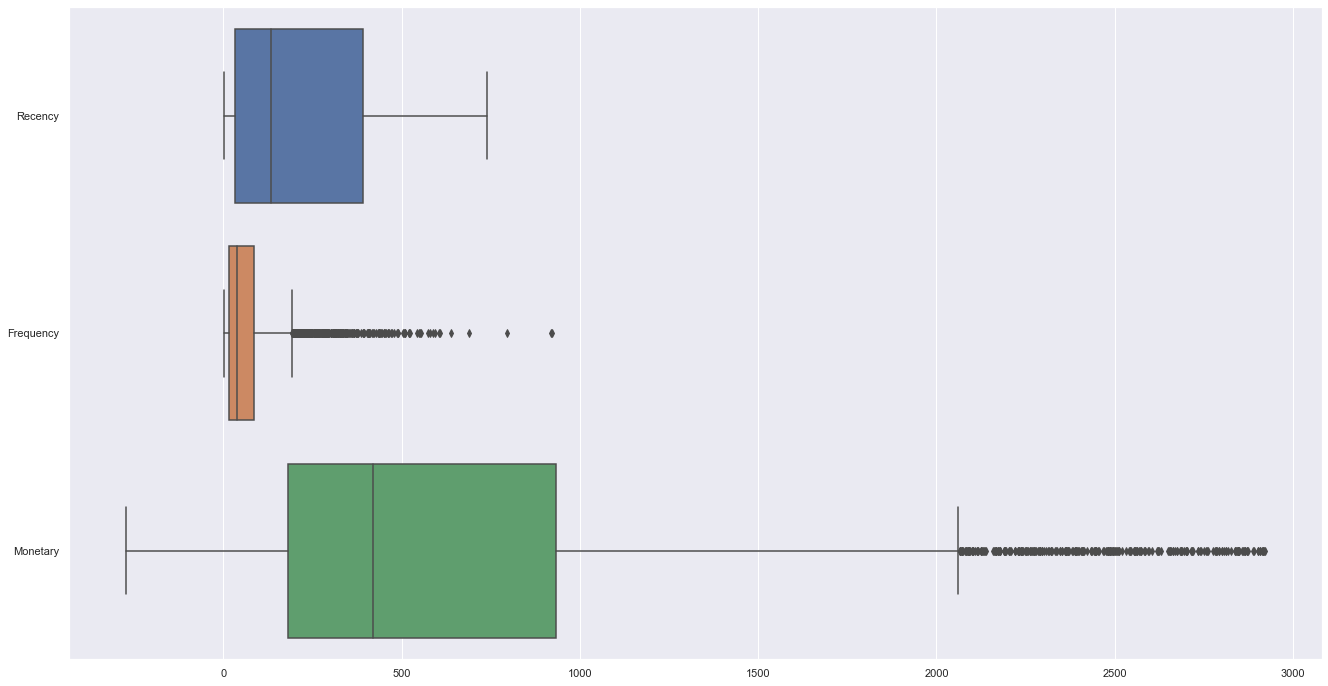

In [28]:
grouped_rfm_df=RFM.copy()

Q1=grouped_rfm_df.Monetary.quantile(0.25)
Q3=grouped_rfm_df.Monetary.quantile(0.75)
IQR = Q3 - Q1
grouped_rfm_df = grouped_rfm_df[(grouped_rfm_df.Monetary >= Q1 - 1.5*IQR) & (grouped_rfm_df.Monetary <= Q3 + 1.5*IQR)] 
#  outlier treatment for revenue
#Q1=grouped_rfm_df.Frequency.quantile(0.25)
#Q3=grouped_rfm_df.Frequency.quantile(0.75)
#IQR = Q3 - Q1
#grouped_rfm_df = grouped_rfm_df[(grouped_rfm_df.Frequency >= Q1 - 1.5*IQR) & (grouped_rfm_df.Frequency <= Q3 + 1.5*IQR)] 
# Plotting BoxPlots for the Bill Amount
sns.set(rc={'figure.figsize':(20,12)})
sns.boxplot(data=grouped_rfm_df[['Recency','Frequency','Monetary']], orient="h")
plt.show()

In [29]:
grouped_rfm_df.head()

,Customer ID,Recency,Frequency,Monetary
0,12346,431,37,311.37
1,12413,67,31,545.20
2,12426,195,73,1086.86
3,12427,22,23,375.01
5,12441,367,10,155.55


In [30]:
# 2. rescaling
rfm_df = grouped_rfm_df[['Monetary', 'Frequency', 'Recency']].copy()

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4818, 3)

In [31]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Monetary', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Monetary,Frequency,Recency
0,-0.540856,-0.355742,0.999119
1,-0.185561,-0.427893,-0.715032
2,0.637470,0.077160,-0.112254
3,-0.444158,-0.524093,-0.926946
4,-0.777619,-0.680419,0.697730


#### <font color ='blue' > Check clustering tendencies of data using Hopskin test </font>

In [32]:
print( "Hopkins test value :" ,  round(hopkins( rfm_df_scaled) *100,2) ,"%" )

Hopkins test value : 95.92 %


#### The data have very good tendecies for clustering

### Compare K-Means, DBSCAN,GMM and take the best on for segmentation

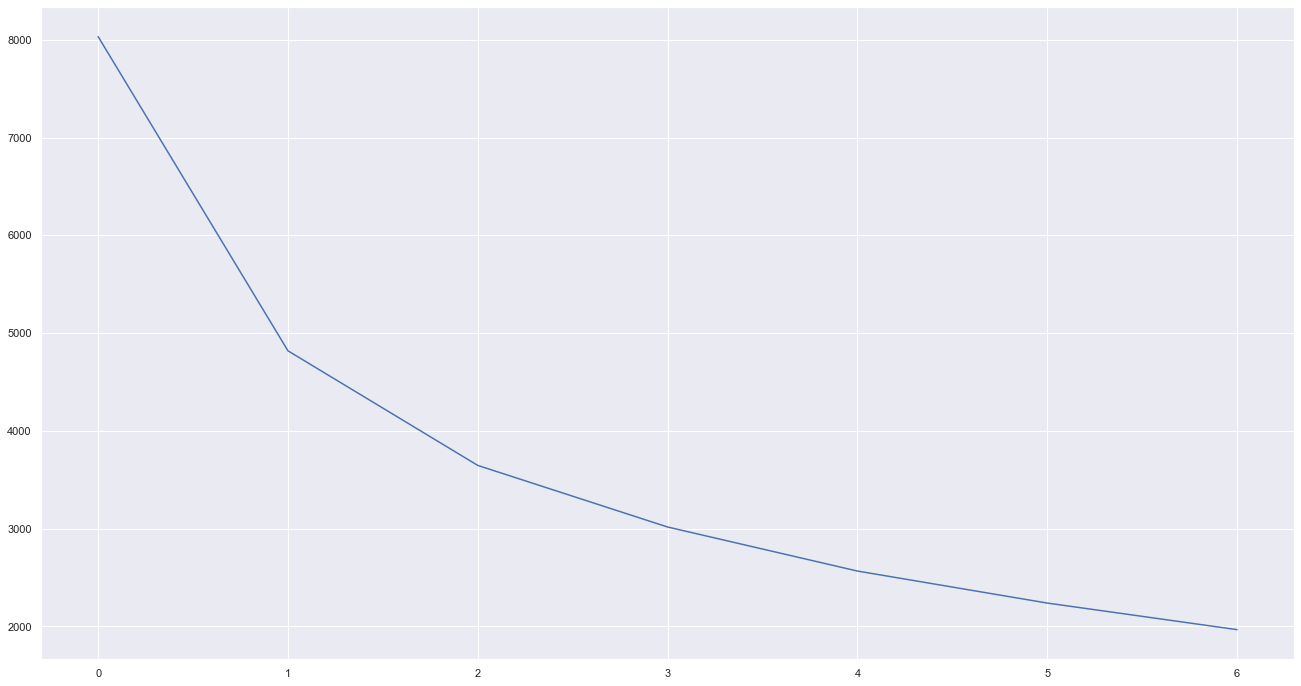

In [33]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    #clusters = kmeans.predict(rfm_df_scaled)
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)  

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [34]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.4744300009644822
For n_clusters=3, the silhouette score is 0.45774450027185054
For n_clusters=4, the silhouette score is 0.4594881930315388
For n_clusters=5, the silhouette score is 0.421445827703242
For n_clusters=6, the silhouette score is 0.38556331926775256
For n_clusters=7, the silhouette score is 0.4000297320274951
For n_clusters=8, the silhouette score is 0.4004332636195345
For n_clusters=9, the silhouette score is 0.3802096675939025


In [35]:
#print(silhouette_score(rfm_df_scaled,cluster_labels))

In [36]:
# final model with k=3
kmeans = KMeans(n_clusters=5, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=5)

In [37]:
kmeans.labels_

array([1, 3, 0, ..., 1, 1, 4])

In [38]:
# assign the label
grouped_rfm_df['KMeans_cluster_id'] = kmeans.labels_
grouped_rfm_df.head(5)

,Customer ID,Recency,Frequency,Monetary,KMeans_cluster_id
0,12346,431,37,311.37,1
1,12413,67,31,545.20,3
2,12426,195,73,1086.86,0
3,12427,22,23,375.01,3
5,12441,367,10,155.55,1


<AxesSubplot:xlabel='KMeans_cluster_id', ylabel='Recency'>

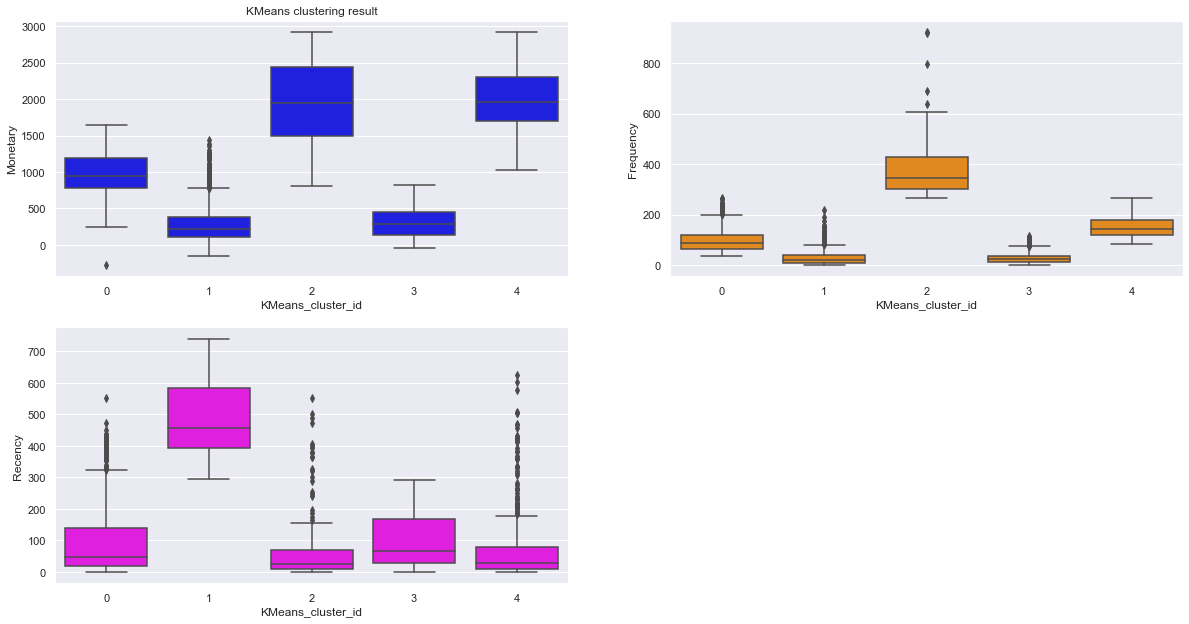

In [39]:
plt.figure(figsize=(18,16))
plt.subplot(3,2,1)
sns.boxplot(x='KMeans_cluster_id', y='Monetary', data=grouped_rfm_df,color="blue")
plt.title("KMeans clustering result")


plt.subplot(3,2,2)
sns.boxplot(x='KMeans_cluster_id', y='Frequency', data=grouped_rfm_df,color="darkorange")
 

plt.subplot(3,2,3)
sns.boxplot(x='KMeans_cluster_id', y='Recency', data=grouped_rfm_df,color="fuchsia")
 
 


##### Cluster 1 is the most benificial cluster according to K-Means

In [40]:
grouped_rfm_df.groupby('KMeans_cluster_id')['Recency','Frequency','Monetary'].mean()

,Recency,Frequency,Monetary
KMeans_cluster_id,,,
0,95.733195,97.621510,978.754315
1,489.243791,27.249020,285.781420
2,73.641618,379.427746,1961.366994
3,99.559639,26.451205,306.625917
4,72.194672,154.012295,2014.641275


In [41]:
grouped_rfm_df.groupby('KMeans_cluster_id')['Customer ID'].count()

KMeans_cluster_id
0    967 
1    1530
2    173 
3    1660
4    488 
Name: Customer ID, dtype: int64

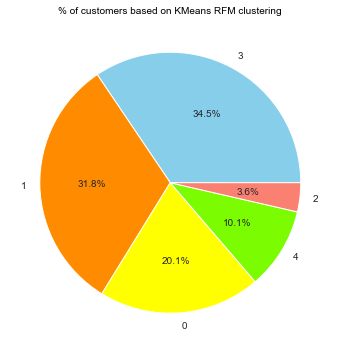

In [42]:
labels=grouped_rfm_df['KMeans_cluster_id'].value_counts().index
colors=['skyblue','darkorange','yellow','lawngreen','salmon']
explode=[0,0,0.1,0,0]
values=grouped_rfm_df['KMeans_cluster_id'].value_counts().values
#grouped_rfm_df.groupby('KMeans_cluster_id')['Monetary'].mean()['Monetary'].values
#visualization
plt.figure(figsize=(6,6))
#plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',fontsize=30)

patches, texts, autotexts = plt.pie(values,labels=labels,colors=colors,autopct='%1.1f%%' )

 
for i in range(len(texts)):
    texts[i].set_fontsize(10) 
    
for i in range(len(autotexts)):
    autotexts[i].set_fontsize(10) 


plt.title('% of customers based on KMeans RFM clustering',color='black',fontsize=10)
plt.show()

### DBSCAN

In [43]:
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(rfm_df_scaled)
distances, indices = neighbors_fit.kneighbors(rfm_df_scaled)

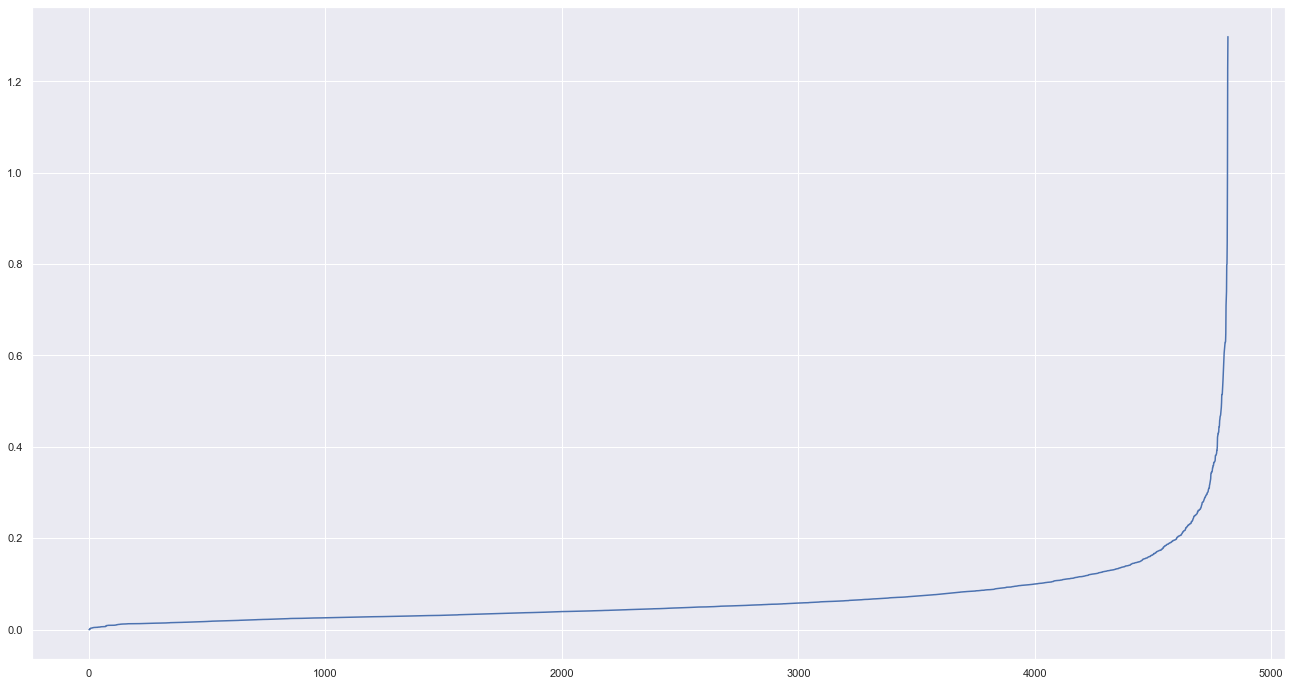

In [44]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [45]:
# create an object
db = DBSCAN(eps=0.2, min_samples=100, metric='euclidean')

# fit the model
db.fit(rfm_df_scaled)

DBSCAN(eps=0.2, min_samples=100)

In [46]:
db.labels_

array([ 1,  0, -1, ..., -1, -1, -1], dtype=int64)

In [47]:
#print(silhouette_score(rfm_df_scaled,db.labels_))

In [48]:
rfm_df_scaled['dbscan_label']=db.labels_
rfm_df_scaled.head()

,Monetary,Frequency,Recency,dbscan_label
0,-0.540856,-0.355742,0.999119,1
1,-0.185561,-0.427893,-0.715032,0
2,0.637470,0.077160,-0.112254,-1
3,-0.444158,-0.524093,-0.926946,0
4,-0.777619,-0.680419,0.697730,1


In [110]:
grouped_rfm_df.groupby('dbscan_label')['Customer ID'].count()

dbscan_label
-1    2958
 0    1040
 1    456 
 2    212 
 3    152 
Name: Customer ID, dtype: int64

In [49]:
grouped_rfm_df['dbscan_label'] = db.labels_
grouped_rfm_df.head(5)

,Customer ID,Recency,Frequency,Monetary,KMeans_cluster_id,dbscan_label
0,12346,431,37,311.37,1,1
1,12413,67,31,545.20,3,0
2,12426,195,73,1086.86,0,-1
3,12427,22,23,375.01,3,0
5,12441,367,10,155.55,1,1


<AxesSubplot:xlabel='dbscan_label', ylabel='Recency'>

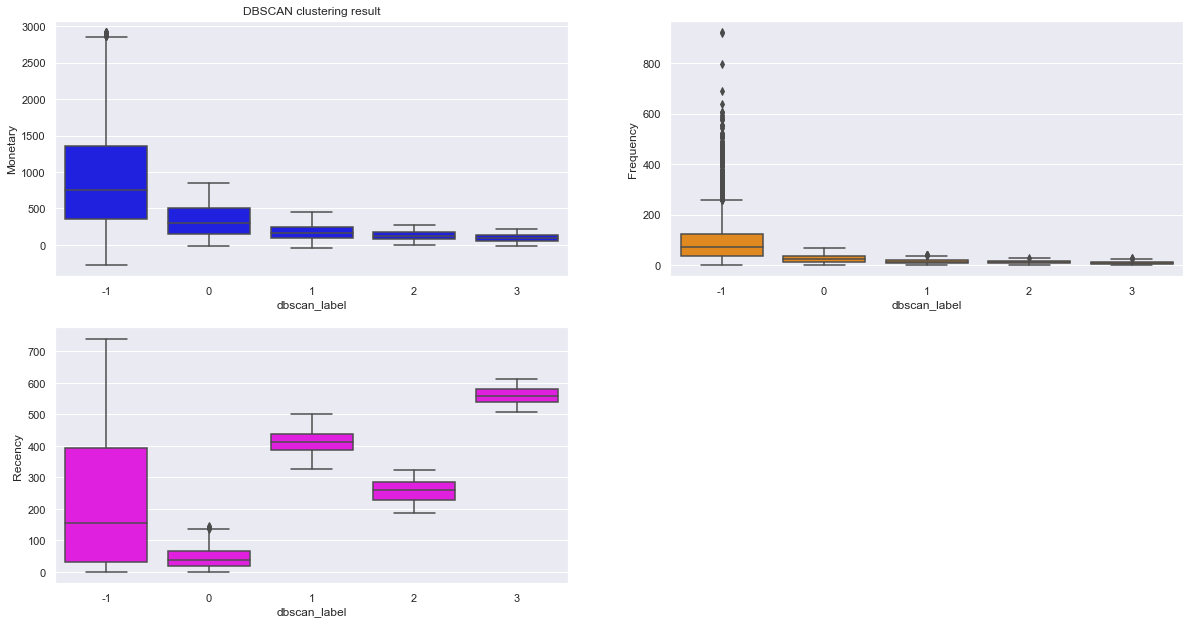

In [50]:
plt.figure(figsize=(18,16))
plt.subplot(3,2,1)
sns.boxplot(x='dbscan_label', y='Monetary', data=grouped_rfm_df,color="blue")
plt.title("DBSCAN clustering result")


plt.subplot(3,2,2)
sns.boxplot(x='dbscan_label', y='Frequency', data=grouped_rfm_df,color="darkorange")
 

plt.subplot(3,2,3)
sns.boxplot(x='dbscan_label', y='Recency', data=grouped_rfm_df,color="fuchsia")
 

In [51]:
grouped_rfm_df.groupby('dbscan_label')['Recency','Frequency','Monetary'].mean()

,Recency,Frequency,Monetary
dbscan_label,,,
-1,229.424273,96.647735,926.311061
0,45.741346,24.008654,340.118647
1,414.107456,14.019737,175.325833
2,256.245283,10.169811,124.505094
3,559.157895,9.190789,99.120263


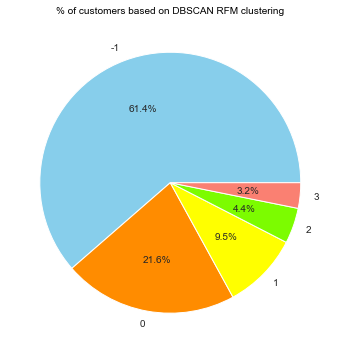

In [52]:
labels=grouped_rfm_df['dbscan_label'].value_counts().index
colors=['skyblue','darkorange','yellow','lawngreen','salmon']
#explode=[0,0,0.1]
values=grouped_rfm_df['dbscan_label'].value_counts().values

#visualization
plt.figure(figsize=(6,6))
#plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',fontsize=30)

patches, texts, autotexts = plt.pie(values,labels=labels,colors=colors,autopct='%1.1f%%' )

 
for i in range(len(texts)):
    texts[i].set_fontsize(10) 
    
for i in range(len(autotexts)):
    autotexts[i].set_fontsize(10) 


plt.title('% of customers based on DBSCAN RFM clustering',color='black',fontsize=10)
plt.show()

Cluster -1 is good but the number of clusters are not good enough 

#### GMM - Gaussian Mixture Model

In [53]:
X = rfm_df_scaled[['Recency','Frequency','Monetary']].values
#Gaussian Mixture
gmm = GaussianMixture(n_components=5,covariance_type='spherical').fit(X)
gmm_labels = gmm.predict(X)
score = gmm.predict_proba(X)
rfm_df_scaled['GMM_labels'] = gmm_labels

In [54]:
rfm_df_scaled.head()

,Monetary,Frequency,Recency,dbscan_label,GMM_labels
0,-0.540856,-0.355742,0.999119,1,0
1,-0.185561,-0.427893,-0.715032,0,2
2,0.637470,0.077160,-0.112254,-1,4
3,-0.444158,-0.524093,-0.926946,0,2
4,-0.777619,-0.680419,0.697730,1,0


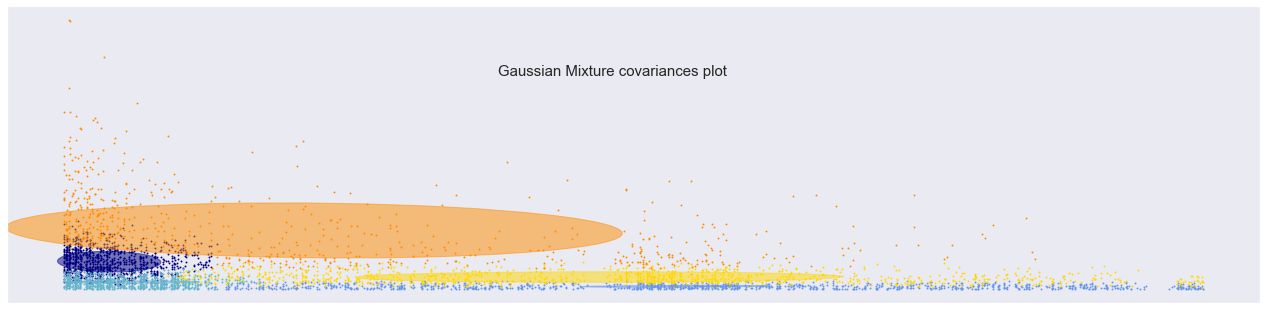

In [55]:
#fit the fist year model
 
                              
np.random.seed(0)

gmm_first = GaussianMixture(n_components=5,covariance_type='full').fit(X)
gmm_first_labels = gmm_first.predict(X)
score = gmm_first.predict_proba(X)

plot_results(X,gmm_first_labels, gmm_first.means_, gmm_first.covariances_, 0,  'Gaussian Mixture covariances plot')


 

In [56]:
grouped_rfm_df['gmm_cluster_id'] =gmm_labels
grouped_rfm_df.head(5)

,Customer ID,Recency,Frequency,Monetary,KMeans_cluster_id,dbscan_label,gmm_cluster_id
0,12346,431,37,311.37,1,1,0
1,12413,67,31,545.20,3,0,2
2,12426,195,73,1086.86,0,-1,4
3,12427,22,23,375.01,3,0,2
5,12441,367,10,155.55,1,1,0


<AxesSubplot:xlabel='gmm_cluster_id', ylabel='Recency'>

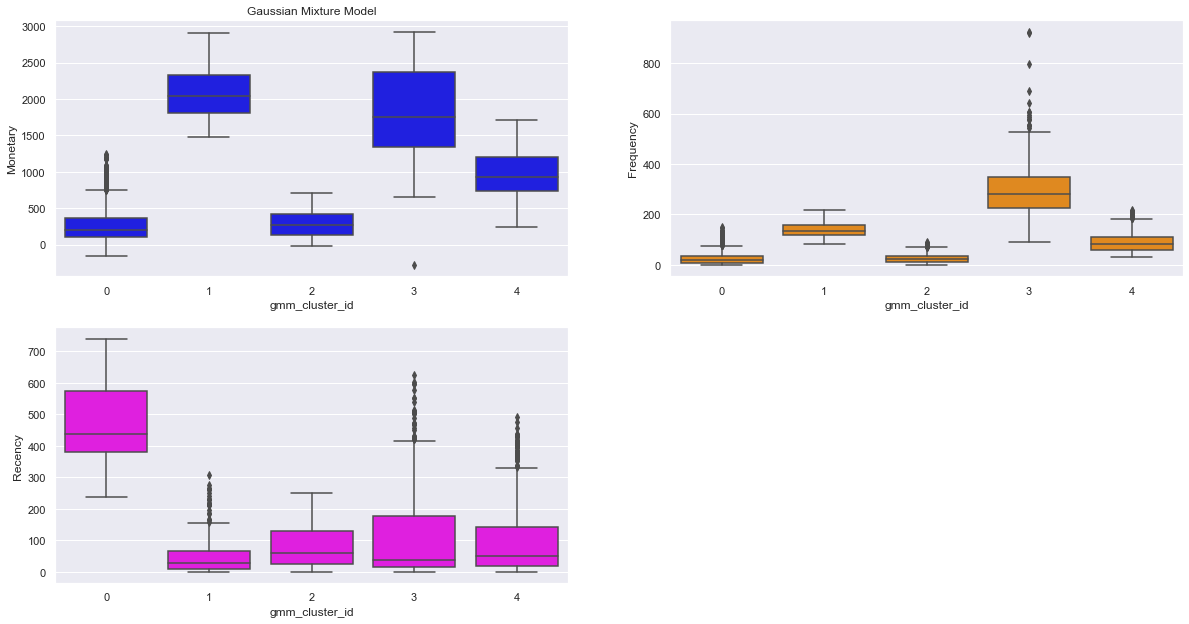

In [57]:
plt.figure(figsize=(18,16))
plt.subplot(3,2,1)
sns.boxplot(x='gmm_cluster_id', y='Monetary', data=grouped_rfm_df,color="blue")
plt.title("Gaussian Mixture Model")


plt.subplot(3,2,2)
sns.boxplot(x='gmm_cluster_id', y='Frequency', data=grouped_rfm_df,color="darkorange")
 

plt.subplot(3,2,3)
sns.boxplot(x='gmm_cluster_id', y='Recency', data=grouped_rfm_df,color="fuchsia")
 

In [58]:
def three_d_plot(data1,data2,data3,data4):
  
    #fig = plt.figure()
    fig=plt.figure(figsize=(16, 14), dpi= 80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(111, projection='3d')
    colors = ['aqua', 'darkgray', 'blue', 'red', 'black', 'yellow', 'green']   
    ax.scatter(data1,data2,data3, c=data4, cmap=matplotlib.colors.ListedColormap(colors))
    plt.title("GMM 3d plot")
    ax.set_xlabel('Recency')
    ax.set_ylabel('Frequency')
    ax.set_zlabel('Monetary')
    plt.show()

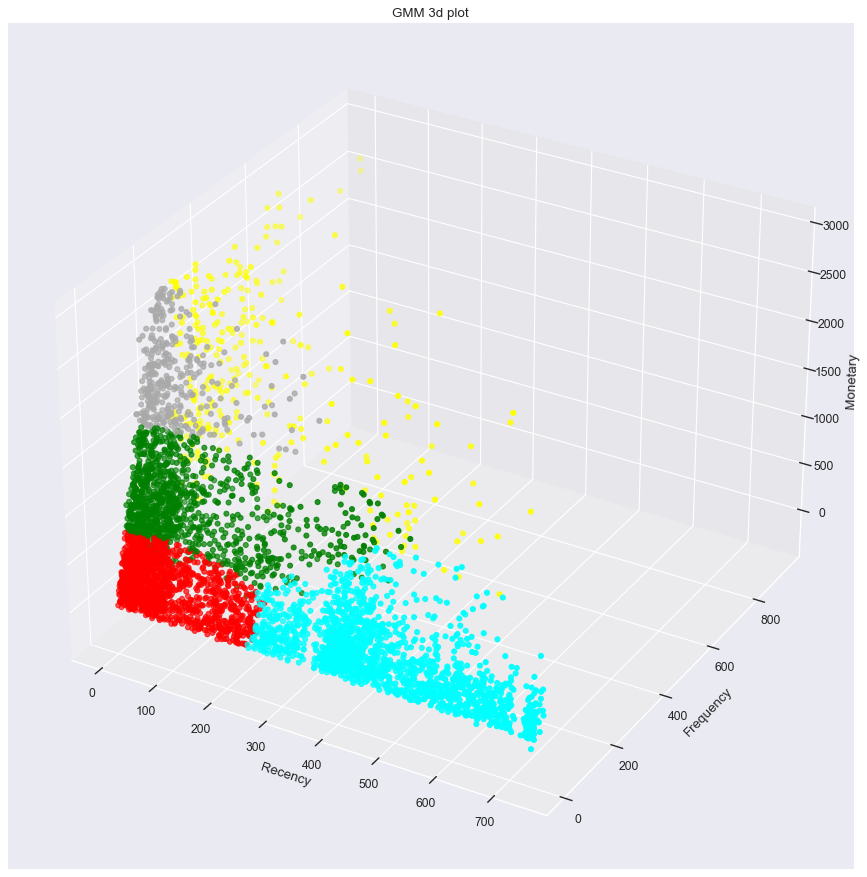

In [59]:
three_d_plot(grouped_rfm_df["Recency"],grouped_rfm_df["Frequency"],grouped_rfm_df["Monetary"],grouped_rfm_df["gmm_cluster_id"])

#d_temp = grouped_rfm_df[grouped_rfm_df['Monetary']<=10000]

#three_d_plot(d_temp["Recency"],d_temp["Frequency"],d_temp["Monetary"],d_temp["gmm_cluster_id"])

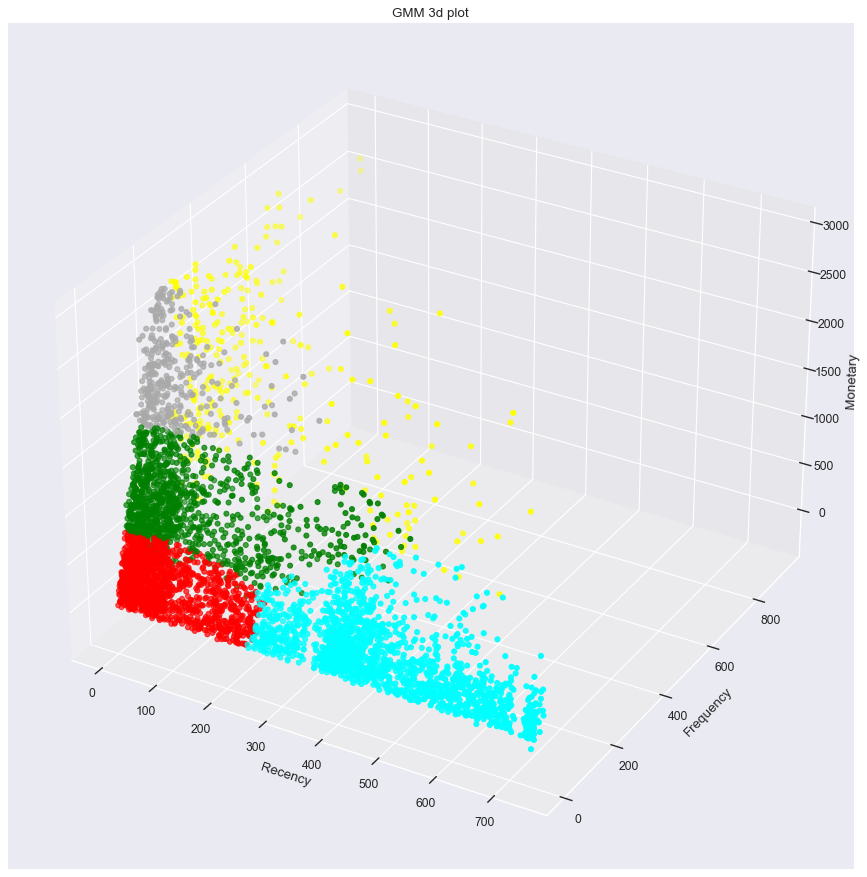

In [60]:
d_temp = grouped_rfm_df[grouped_rfm_df['Monetary']<=10000]

three_d_plot(d_temp["Recency"],d_temp["Frequency"],d_temp["Monetary"],d_temp["gmm_cluster_id"])

In [61]:
df_silhouette = pd.DataFrame({"Clustering_Method":["kmeans", "DBSCAN","Gaussian mixture model"],
                              "Silhouette_score":[silhouette_score(rfm_df_scaled, kmeans.labels_),         
                                                  silhouette_score(rfm_df_scaled,db.labels_),   
                                                 silhouette_score(rfm_df_scaled,gmm_labels)],
                             "Total Clusters":[kmeans.labels_.max()+1,db.labels_.max()+2,gmm_labels.max()+1]})

In [62]:
df_silhouette

,Clustering_Method,Silhouette_score,Total Clusters
0,kmeans,0.440240,5
1,DBSCAN,0.166816,5
2,Gaussian mixture model,0.519270,5


In [63]:
grouped_rfm_df.groupby('gmm_cluster_id')['Customer ID'].count()

gmm_cluster_id
0    1657
1    347 
2    1409
3    312 
4    1093
Name: Customer ID, dtype: int64

In [64]:
df_silhouette

,Clustering_Method,Silhouette_score,Total Clusters
0,kmeans,0.440240,5
1,DBSCAN,0.166816,5
2,Gaussian mixture model,0.519270,5


<font color='blue'>Silhouette score of GMM is much better but there is onle cluster which has only two customers </font>

In [65]:
grouped_rfm_df.groupby('gmm_cluster_id')['Monetary', 'Frequency', 'Recency'].mean().sort_values(by=['Monetary','Frequency','Recency'],ascending=False)

,Monetary,Frequency,Recency
gmm_cluster_id,,,
1,2097.012311,139.916427,48.717579
3,1821.087147,305.698718,124.403846
4,966.375429,90.752973,94.458371
2,292.476793,24.803407,82.224273
0,272.161039,25.786964,470.453229


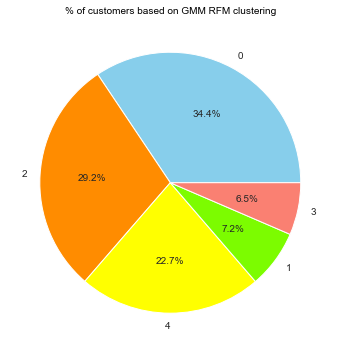

In [66]:
labels=grouped_rfm_df['gmm_cluster_id'].value_counts().index
colors=['skyblue','darkorange','yellow','lawngreen','salmon']
explode=[0,0,0.1,0,0]
values=grouped_rfm_df['gmm_cluster_id'].value_counts().values

#visualization
plt.figure(figsize=(6,6))
#plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',fontsize=30)

patches, texts, autotexts = plt.pie(values,labels=labels,colors=colors,autopct='%1.1f%%' )

 
for i in range(len(texts)):
    texts[i].set_fontsize(10) 
    
for i in range(len(autotexts)):
    autotexts[i].set_fontsize(10) 


plt.title('% of customers based on GMM RFM clustering',color='black',fontsize=10)
plt.show()

In [67]:
pca = PCA()
pca.fit(rfm_df_scaled)
pca_samples = pca.transform(rfm_df_scaled)

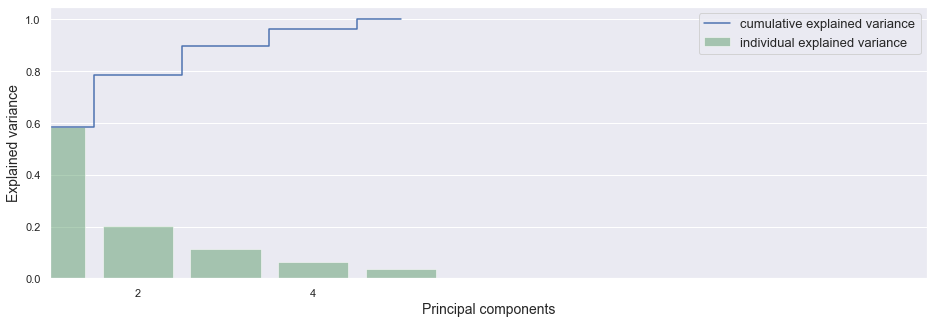

In [68]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.set(font_scale=1)
plt.step(range(rfm_df_scaled.shape[1]), pca.explained_variance_ratio_.cumsum(), where='mid',
         label='cumulative explained variance')
sns.barplot(np.arange(1,rfm_df_scaled.shape[1]+1), pca.explained_variance_ratio_, alpha=0.5, color = 'g',
            label='individual explained variance')
plt.xlim(0, 10)

ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel('Explained variance', fontsize = 14)
plt.xlabel('Principal components', fontsize = 14)
plt.legend(loc='best', fontsize = 13);

#### <font color='blue'>PCA is forming 4 clusters only which is supporting the results derived from K-Means and DBSCAN </font>

In [69]:
grouped_rfm_df.to_excel("grouped_rfm_df_with_C.xlsx", index=False)

## <font color='blue'>Let's see how well the RFM lifetimes perform</font>

In [70]:
grouped_rfm_df_LT=RFM_LT.copy()

In [71]:
grouped_rfm_df_LT.head()

,Customer ID,Frequency,Recency,Monetary
0,12346,8.0,294.0,725.0
1,12413,2.0,271.0,337.0
2,12426,2.0,468.0,662.0
3,12427,3.0,350.0,371.0
4,12437,36.0,736.0,737.0


In [72]:
# 2. rescaling
rfm_df = grouped_rfm_df_LT[['Monetary', 'Frequency', 'Recency']].copy()

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(5363, 3)

In [73]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Monetary', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Monetary,Frequency,Recency
0,1.115712,0.292532,0.073956
1,-0.615655,-0.292024,-0.014962
2,0.834588,-0.292024,0.746643
3,-0.463937,-0.194598,0.290453
4,1.169259,3.020462,1.782735


#### <font color ='blue' > Check clustering tendencies of data using Hopskin test </font>

In [74]:
print( "Hopkins test value :" ,  round(hopkins( rfm_df_scaled) *100,2) ,"%" )

Hopkins test value : 98.64 %


#### The data have very good tendecies for clustering

### Compare K-Means, DBSCAN,GMM and take the best on for segmentation

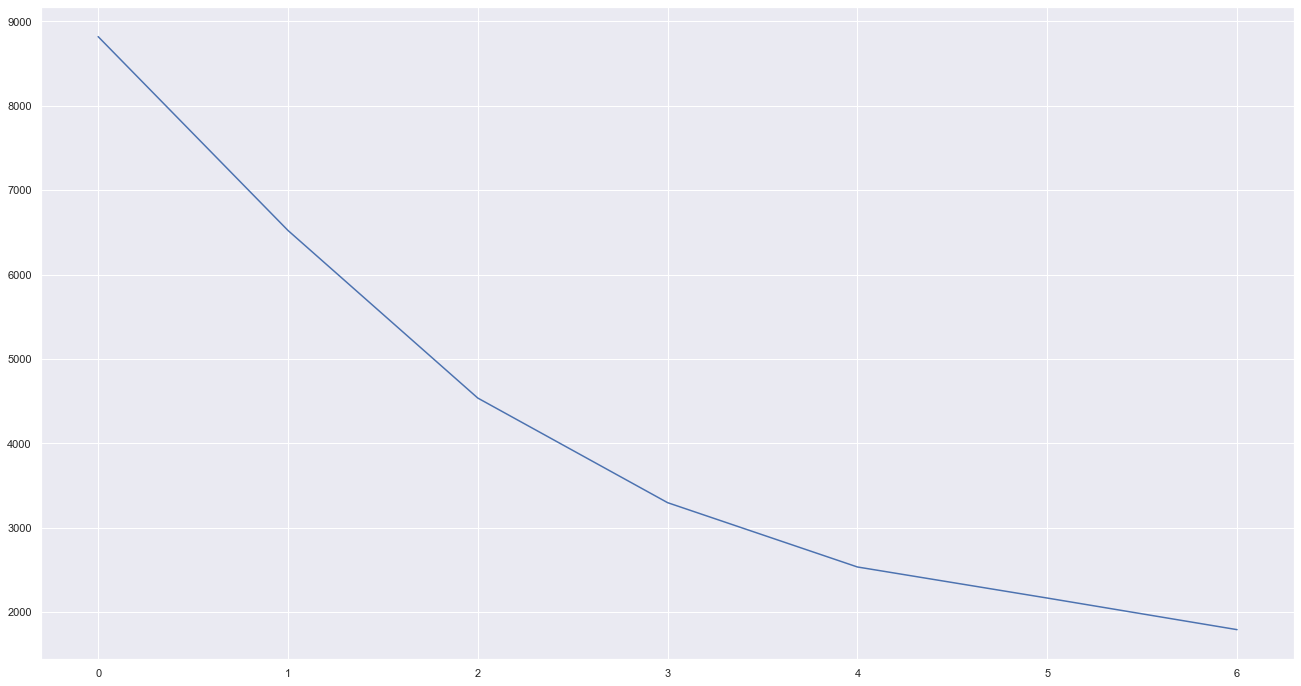

In [75]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    #clusters = kmeans.predict(rfm_df_scaled)
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)  

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [76]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.46348251552104414
For n_clusters=3, the silhouette score is 0.42811970496274476
For n_clusters=4, the silhouette score is 0.4447988461411167
For n_clusters=5, the silhouette score is 0.4555805928048814
For n_clusters=6, the silhouette score is 0.44752266849641087
For n_clusters=7, the silhouette score is 0.4155653174468417
For n_clusters=8, the silhouette score is 0.437043950927754
For n_clusters=9, the silhouette score is 0.42920707218343584


In [77]:
# final model with k=3
kmeans = KMeans(n_clusters=5, max_iter=100)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=100, n_clusters=5)

In [78]:
kmeans.labels_

array([0, 1, 0, ..., 4, 4, 0])

In [79]:
# assign the label
grouped_rfm_df_LT['KMeans_cluster_id'] = kmeans.labels_
grouped_rfm_df_LT.head(5)

,Customer ID,Frequency,Recency,Monetary,KMeans_cluster_id
0,12346,8.0,294.0,725.0,0
1,12413,2.0,271.0,337.0,1
2,12426,2.0,468.0,662.0,0
3,12427,3.0,350.0,371.0,0
4,12437,36.0,736.0,737.0,3


<AxesSubplot:xlabel='KMeans_cluster_id', ylabel='Recency'>

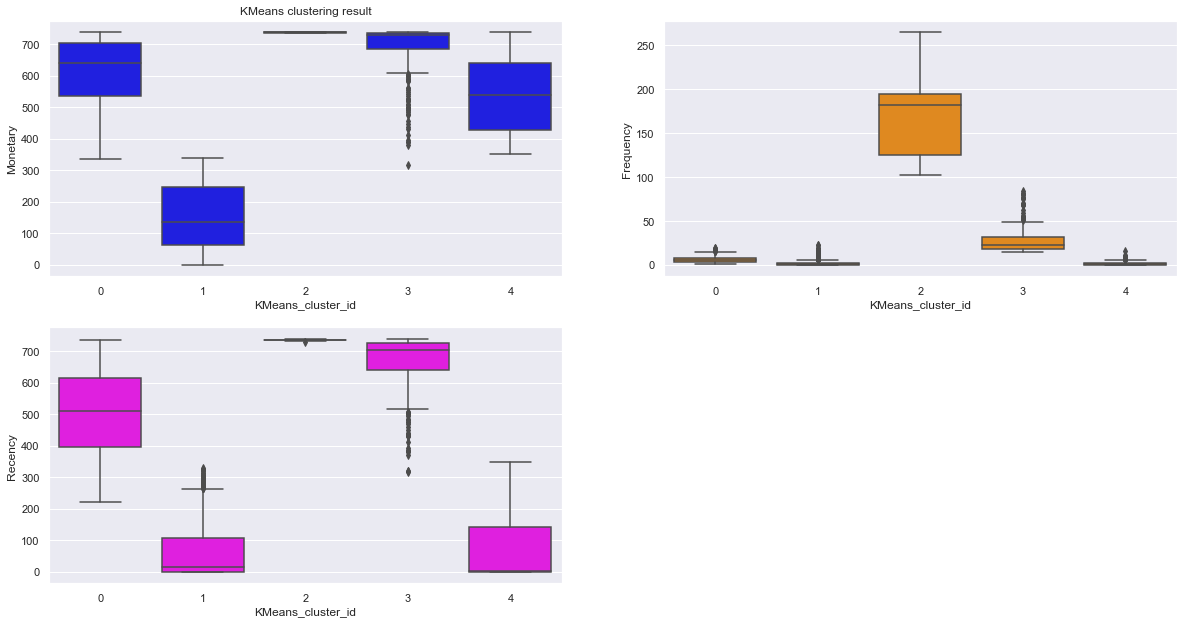

In [80]:
plt.figure(figsize=(18,16))
plt.subplot(3,2,1)
sns.boxplot(x='KMeans_cluster_id', y='Monetary', data=grouped_rfm_df_LT,color="blue")
plt.title("KMeans clustering result")


plt.subplot(3,2,2)
sns.boxplot(x='KMeans_cluster_id', y='Frequency', data=grouped_rfm_df_LT,color="darkorange")
 

plt.subplot(3,2,3)
sns.boxplot(x='KMeans_cluster_id', y='Recency', data=grouped_rfm_df_LT,color="fuchsia")
 
 


##### Cluster 1 is the most benificial cluster according to K-Means

In [81]:
grouped_rfm_df_LT.groupby('KMeans_cluster_id')['Recency','Frequency','Monetary'].mean()

,Recency,Frequency,Monetary
KMeans_cluster_id,,,
0,510.363961,5.707504,609.250128
1,63.263760,1.576126,151.776269
2,734.750000,171.000000,737.000000
3,668.592875,26.348601,693.440204
4,73.057980,1.054863,538.018703


In [82]:
grouped_rfm_df_LT.groupby('KMeans_cluster_id')['Customer ID'].count()

KMeans_cluster_id
0    1959
1    1399
2    8   
3    393 
4    1604
Name: Customer ID, dtype: int64

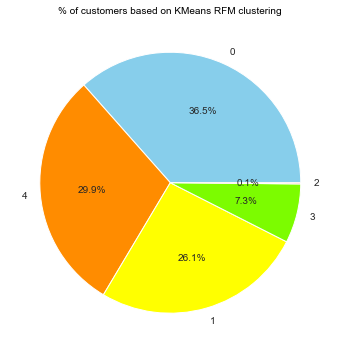

In [83]:
labels=grouped_rfm_df_LT['KMeans_cluster_id'].value_counts().index
colors=['skyblue','darkorange','yellow','lawngreen','salmon']
explode=[0,0,0.1,0,0]
values=grouped_rfm_df_LT['KMeans_cluster_id'].value_counts().values
 
#visualization
plt.figure(figsize=(6,6))
 

patches, texts, autotexts = plt.pie(values,labels=labels,colors=colors,autopct='%1.1f%%' )

 
for i in range(len(texts)):
    texts[i].set_fontsize(10) 
    
for i in range(len(autotexts)):
    autotexts[i].set_fontsize(10) 


plt.title('% of customers based on KMeans RFM clustering',color='black',fontsize=10)
plt.show()

### DBSCAN

In [84]:
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(rfm_df_scaled)
distances, indices = neighbors_fit.kneighbors(rfm_df_scaled)

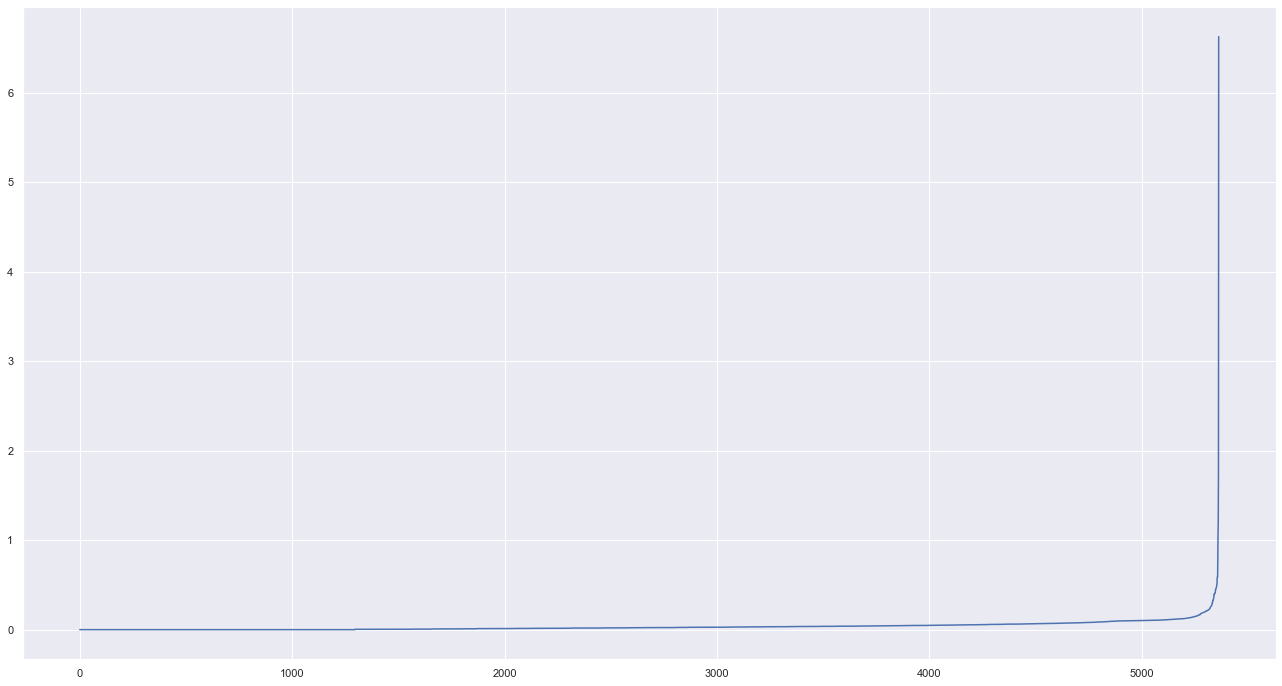

In [85]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [86]:
# create an object
db = DBSCAN(eps=0.3, min_samples=100, metric='euclidean')

# fit the model
db.fit(rfm_df_scaled)

DBSCAN(eps=0.3, min_samples=100)

In [87]:
db.labels_

array([-1,  0,  0, ...,  1,  1,  0], dtype=int64)

In [88]:
rfm_df_scaled['dbscan_label']=db.labels_
rfm_df_scaled.head()

,Monetary,Frequency,Recency,dbscan_label
0,1.115712,0.292532,0.073956,-1
1,-0.615655,-0.292024,-0.014962,0
2,0.834588,-0.292024,0.746643,0
3,-0.463937,-0.194598,0.290453,0
4,1.169259,3.020462,1.782735,-1


In [89]:
grouped_rfm_df_LT['dbscan_label'] = db.labels_
grouped_rfm_df_LT.head(5)

,Customer ID,Frequency,Recency,Monetary,KMeans_cluster_id,dbscan_label
0,12346,8.0,294.0,725.0,0,-1
1,12413,2.0,271.0,337.0,1,0
2,12426,2.0,468.0,662.0,0,0
3,12427,3.0,350.0,371.0,0,0
4,12437,36.0,736.0,737.0,3,-1


<AxesSubplot:xlabel='dbscan_label', ylabel='Recency'>

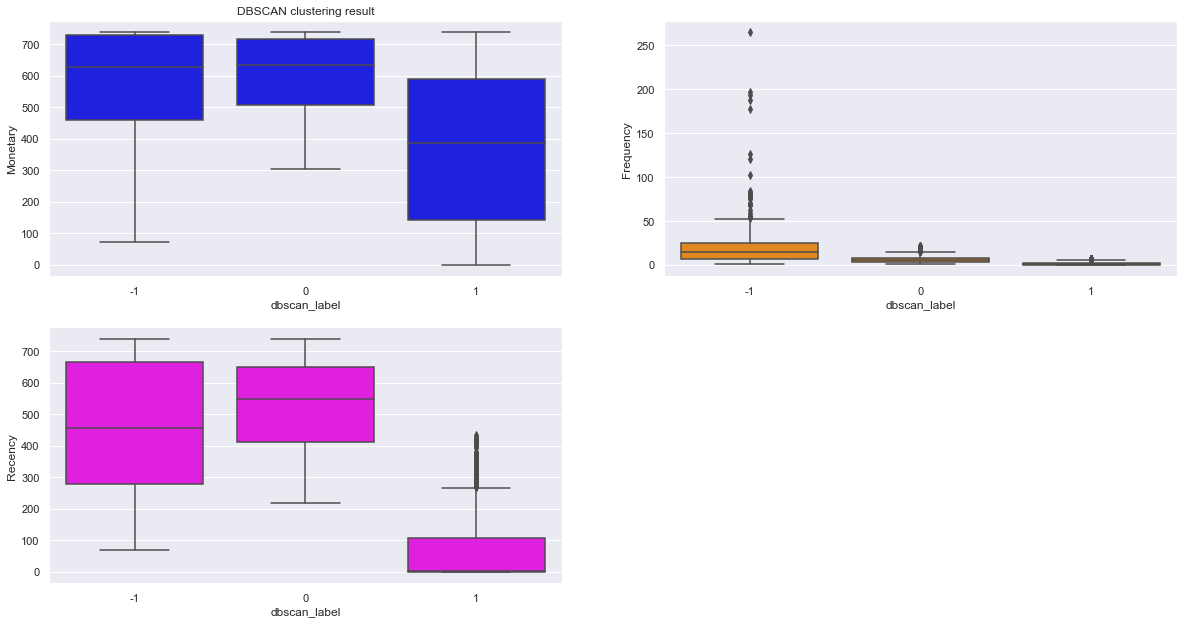

In [90]:
plt.figure(figsize=(18,16))
plt.subplot(3,2,1)
sns.boxplot(x='dbscan_label', y='Monetary', data=grouped_rfm_df_LT,color="blue")
plt.title("DBSCAN clustering result")


plt.subplot(3,2,2)
sns.boxplot(x='dbscan_label', y='Frequency', data=grouped_rfm_df_LT,color="darkorange")
 

plt.subplot(3,2,3)
sns.boxplot(x='dbscan_label', y='Recency', data=grouped_rfm_df_LT,color="fuchsia")
 

In [91]:
grouped_rfm_df_LT.groupby('dbscan_label')['Recency','Frequency','Monetary'].mean()

,Recency,Frequency,Monetary
dbscan_label,,,
-1,460.017081,19.425466,580.257764
0,534.128910,6.080367,600.521036
1,65.480977,1.053403,370.053752


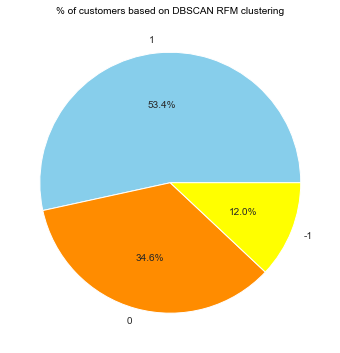

In [92]:
labels=grouped_rfm_df_LT['dbscan_label'].value_counts().index
colors=['skyblue','darkorange','yellow','lawngreen','salmon']
#explode=[0,0,0.1]
values=grouped_rfm_df_LT['dbscan_label'].value_counts().values

#visualization
plt.figure(figsize=(6,6))
#plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',fontsize=30)

patches, texts, autotexts = plt.pie(values,labels=labels,colors=colors,autopct='%1.1f%%' )

 
for i in range(len(texts)):
    texts[i].set_fontsize(10) 
    
for i in range(len(autotexts)):
    autotexts[i].set_fontsize(10) 


plt.title('% of customers based on DBSCAN RFM clustering',color='black',fontsize=10)
plt.show()

Cluster -1 is good but the number of clusters are not good enough 

#### GMM - Gaussian Mixture Model

In [93]:
X = rfm_df_scaled[['Recency','Frequency','Monetary']].values
#Gaussian Mixture
gmm = GaussianMixture(n_components=5,covariance_type='spherical').fit(X)
gmm_labels = gmm.predict(X)
score = gmm.predict_proba(X)
rfm_df_scaled['GMM_labels'] = gmm_labels

In [94]:
rfm_df_scaled.head()

,Monetary,Frequency,Recency,dbscan_label,GMM_labels
0,1.115712,0.292532,0.073956,-1,4
1,-0.615655,-0.292024,-0.014962,0,4
2,0.834588,-0.292024,0.746643,0,4
3,-0.463937,-0.194598,0.290453,0,4
4,1.169259,3.020462,1.782735,-1,1


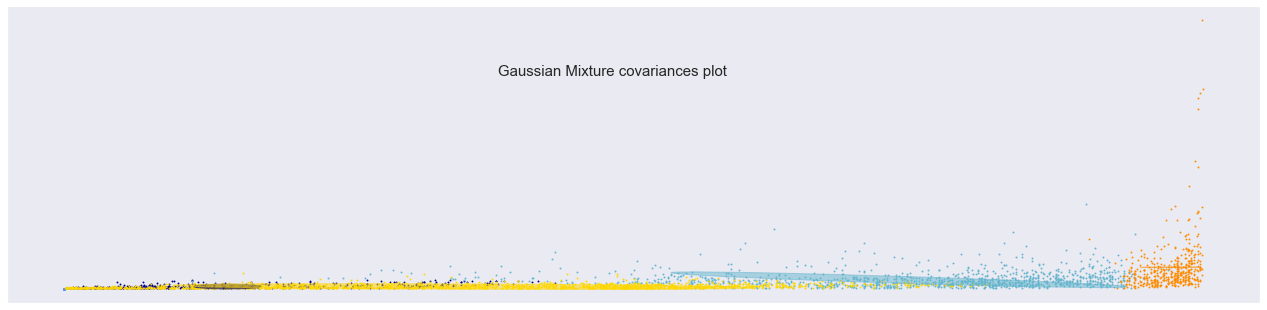

In [95]:
#fit the fist year model
 
                              
np.random.seed(0)

gmm_first = GaussianMixture(n_components=5,covariance_type='full').fit(X)
gmm_first_labels = gmm_first.predict(X)
score = gmm_first.predict_proba(X)

plot_results(X,gmm_first_labels, gmm_first.means_, gmm_first.covariances_, 0,  'Gaussian Mixture covariances plot')


 

In [96]:
grouped_rfm_df_LT['gmm_cluster_id'] =gmm_labels
grouped_rfm_df_LT.head(5)

,Customer ID,Frequency,Recency,Monetary,KMeans_cluster_id,dbscan_label,gmm_cluster_id
0,12346,8.0,294.0,725.0,0,-1,4
1,12413,2.0,271.0,337.0,1,0,4
2,12426,2.0,468.0,662.0,0,0,4
3,12427,3.0,350.0,371.0,0,0,4
4,12437,36.0,736.0,737.0,3,-1,1


<AxesSubplot:xlabel='gmm_cluster_id', ylabel='Recency'>

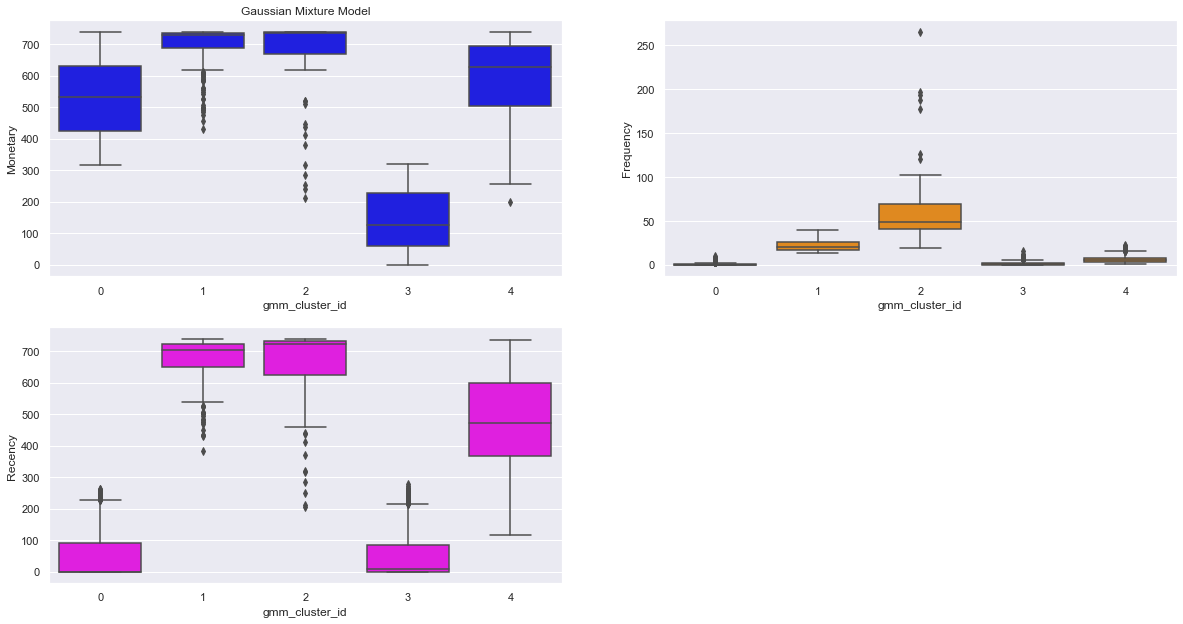

In [97]:
plt.figure(figsize=(18,16))
plt.subplot(3,2,1)
sns.boxplot(x='gmm_cluster_id', y='Monetary', data=grouped_rfm_df_LT,color="blue")
plt.title("Gaussian Mixture Model")


plt.subplot(3,2,2)
sns.boxplot(x='gmm_cluster_id', y='Frequency', data=grouped_rfm_df_LT,color="darkorange")
 

plt.subplot(3,2,3)
sns.boxplot(x='gmm_cluster_id', y='Recency', data=grouped_rfm_df_LT,color="fuchsia")
 

In [98]:
def three_d_plot(data1,data2,data3,data4):
  
    #fig = plt.figure()
    fig=plt.figure(figsize=(16, 14), dpi= 80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(111, projection='3d')
    colors = ['aqua', 'darkgray', 'blue', 'red', 'black', 'yellow', 'green']   
    ax.scatter(data1,data2,data3, c=data4, cmap=matplotlib.colors.ListedColormap(colors))
    plt.title("GMM 3d plot")
    ax.set_xlabel('Recency')
    ax.set_ylabel('Frequency')
    ax.set_zlabel('Monetary')
    plt.show()

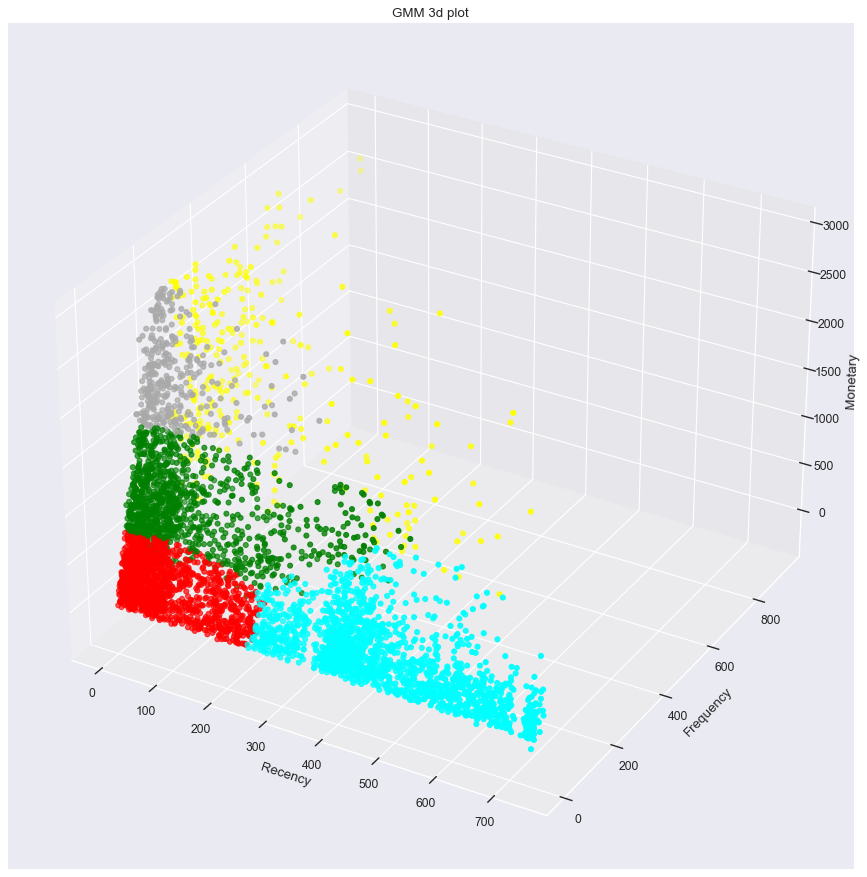

In [100]:
#three_d_plot(grouped_rfm_df_LT["Recency"],grouped_rfm_df["Frequency"],grouped_rfm_df_LT["Monetary"],grouped_rfm_df_LT["gmm_cluster_id"])

d_temp = grouped_rfm_df[grouped_rfm_df['Monetary']<=10000]

three_d_plot(d_temp["Recency"],d_temp["Frequency"],d_temp["Monetary"],d_temp["gmm_cluster_id"])

In [101]:
df_silhouette = pd.DataFrame({"Clustering_Method":["kmeans", "DBSCAN","Gaussian mixture model"],
                              "Silhouette_score":[silhouette_score(rfm_df_scaled, kmeans.labels_),         
                                                  silhouette_score(rfm_df_scaled,db.labels_),   
                                                 silhouette_score(rfm_df_scaled,gmm_labels)],
                             "Total Clusters":[kmeans.labels_.max()+1,db.labels_.max()+2,gmm_labels.max()+1]})

In [102]:
df_silhouette

,Clustering_Method,Silhouette_score,Total Clusters
0,kmeans,0.591790,5
1,DBSCAN,0.363009,3
2,Gaussian mixture model,0.665823,5


In [103]:
grouped_rfm_df_LT.groupby('gmm_cluster_id')['Customer ID'].count()

gmm_cluster_id
0    1445
1    354 
2    65  
3    1308
4    2191
Name: Customer ID, dtype: int64

In [104]:
df_silhouette

,Clustering_Method,Silhouette_score,Total Clusters
0,kmeans,0.591790,5
1,DBSCAN,0.363009,3
2,Gaussian mixture model,0.665823,5


<font color='blue'>Silhouette score of GMM is much better but there is onle cluster which has only two customers </font>

In [105]:
grouped_rfm_df_LT.groupby('gmm_cluster_id')['Monetary', 'Frequency', 'Recency'].mean().sort_values(by=['Monetary','Frequency','Recency'],ascending=False)

,Monetary,Frequency,Recency
gmm_cluster_id,,,
1,701.330508,21.895480,675.768362
2,660.661538,64.630769,643.061538
4,594.169329,5.480146,481.322227
0,532.606228,0.820069,48.392388
3,141.132263,1.266820,52.449541


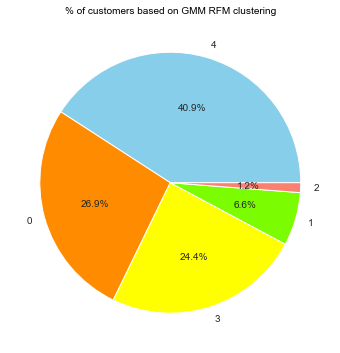

In [106]:
labels=grouped_rfm_df_LT['gmm_cluster_id'].value_counts().index
colors=['skyblue','darkorange','yellow','lawngreen','salmon']
explode=[0,0,0.1,0,0]
values=grouped_rfm_df_LT['gmm_cluster_id'].value_counts().values

#visualization
plt.figure(figsize=(6,6))
#plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',fontsize=30)

patches, texts, autotexts = plt.pie(values,labels=labels,colors=colors,autopct='%1.1f%%' )

 
for i in range(len(texts)):
    texts[i].set_fontsize(10) 
    
for i in range(len(autotexts)):
    autotexts[i].set_fontsize(10) 


plt.title('% of customers based on GMM RFM clustering',color='black',fontsize=10)
plt.show()

In [107]:
pca = PCA()
pca.fit(rfm_df_scaled)
pca_samples = pca.transform(rfm_df_scaled)

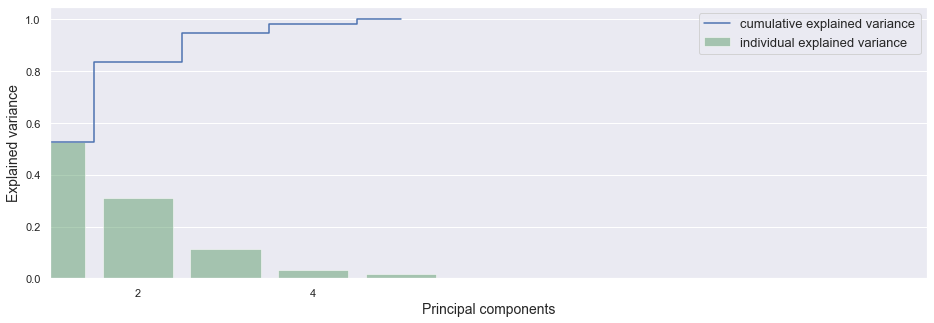

In [108]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.set(font_scale=1)
plt.step(range(rfm_df_scaled.shape[1]), pca.explained_variance_ratio_.cumsum(), where='mid',
         label='cumulative explained variance')
sns.barplot(np.arange(1,rfm_df_scaled.shape[1]+1), pca.explained_variance_ratio_, alpha=0.5, color = 'g',
            label='individual explained variance')
plt.xlim(0, 10)

ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel('Explained variance', fontsize = 14)
plt.xlabel('Principal components', fontsize = 14)
plt.legend(loc='best', fontsize = 13);

##### In this case also the GMM perfmed well and PCA also supports 5 clusters, but the covareince chart is better in manually calculated RFM.

In [109]:
grouped_rfm_df_LT.to_excel("grouped_rfm_df_LT_with_C.xlsx", index=False)

___
## 3. Conclusion

The work described in this notebook is based on a database providing details on purchases made on an E-commerce platform over a 